In [2]:
import pandas as pd
from pandas import NA
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.DataFrame()

In [6]:
def clean_and_convert_int_nullable(val):
    val = str(val).strip().replace(',', '')  # Remove commas and whitespace
    if val.lower() in ['', '-', 'na', 'nan']:  # Replace placeholder strings with NaN
        return np.nan  # Use np.nan for missing/invalid data instead of pd.NA for sklearn compatibility
    return pd.to_numeric(val, errors='coerce')  # Convert safely to a number (returns NaN if conversion fails)

# --- Read CSV safely ---
# NOTE: The 'converters' parameter should be on the same indentation level as the other read_csv arguments
df = pd.read_csv("unedited_copy.csv", #reads a CSV file named unedited_copy.csv and loads it into a DataFrame called df
    encoding="latin1", #tells pandas how to interpret special characters inside the file like ü, ø and ñ, which utf-8 can't
    on_bad_lines="skip",  #skip any lines that are broken or don’t match the expected column count.
    low_memory=False, #Makes pandas read the entire file in 1 go, preventing data type warnings coming from the default reading style
    converters={
        'Sales': clean_and_convert_int_nullable, #apply the custom function to clean numeric strings (remove commas, handle “NA”, etc.)
        'Units sold': clean_and_convert_int_nullable,
        'Avg unit price': clean_and_convert_int_nullable
    },
    dtype={  #manually sets the data type for certain columns
        'Shop name': str,
        'Shop type': str,
        'Brand': str,
        'L1 category': str,
        'L2 category': str,
        'L3 category': str
    }
)

In [7]:
print(df.shape)

(876319, 10)


In [10]:
print(df.dtypes.head(10))

Product name       object
Shop name          object
Shop type          object
Brand              object
L1 category        object
L2 category        object
L3 category        object
Sales             float64
Units sold        float64
Avg unit price    float64
dtype: object


In [12]:
print(df.head())

                                        Product name  \
0  FLASH SALE - Phin b_n nng c_p COLORKEY water...   
1  Son Focallure M_ Nh_ Nhung æm D_u D__ng _m Tho...   
2  [COMBO MUA 1 T_NG 1 çP D_NG 05/07-08/07] Bigsi...   
3                      n__c t_y trang Bioderma 500ml   
4  1 ST 3 CåY SON _ïNG ANH-T_NG T_Y T_ BËO CH_T ...   

                    Shop name Shop type      Brand L1 category  L2 category  \
0                 COLORKEY.VN     Brand   Colorkey      Makeup   Lip Makeup   
1                FOCALLURE.VN     Brand  Focallure      Makeup   Lip Makeup   
2              Cocoon Vietnam     Brand     Cocoon      Makeup  Face Makeup   
3             auroracastle121       KOL   Bioderma      Makeup  Face Makeup   
4  M_ PH_M _ïNG ANH-HU_NH NH_       KOL          -      Makeup   Lip Makeup   

      L3 category         Sales  Units sold  Avg unit price  
0        Lipstick  4.693336e+09     35252.0        133137.0  
1        Lipstick  2.866476e+09     42272.0         67810.0  
2 

In [14]:
print(df.tail())

       Product name Shop name Shop type Brand L1 category L2 category  \
876314          NaN       NaN       NaN   NaN         NaN         NaN   
876315          NaN       NaN       NaN   NaN         NaN         NaN   
876316          NaN       NaN       NaN   NaN         NaN         NaN   
876317          NaN       NaN       NaN   NaN         NaN         NaN   
876318          NaN       NaN       NaN   NaN         NaN         NaN   

       L3 category  Sales  Units sold  Avg unit price  
876314         NaN    NaN         NaN             NaN  
876315         NaN    NaN         NaN             NaN  
876316         NaN    NaN         NaN             NaN  
876317         NaN    NaN         NaN             NaN  
876318         NaN    NaN         NaN             NaN  


In [16]:
# 1. Drop rows where ALL values are NaN (or the equivalent zero for your numeric columns)
# We focus on the non-numeric (string) columns, as they reliably show NaN for junk rows.
df_cleaned = df.dropna(subset=['Shop name', 'Brand', 'L2 category'], how='all')

# Check the new tail and shape
print(df_cleaned.tail())
print("\nDataFrame Shape:", df_cleaned.shape)

# Reassign to the original df variable
df = df_cleaned

                                            Product name  \
26213                 Base, Top, C_ng hoa h_ng chai 15ml   
26214                     base, top , c_ng mgn hoa h_ng   
26215  S_n gel Very Good Nail st 44 mu 15ml [ t_ng ...   
26216         S_n gel l_nh l_ mu, base top 2in gel l_nh   
26217  FelinWel-My S_y Mng Mini C_m Tay 6W, _n UV ...   

                   Shop name Shop type     Brand L1 category  L2 category  \
26213             Ngocminail         -         -      Makeup  Nail Makeup   
26214  Ph_m Linh Nails Store         -         -      Makeup  Nail Makeup   
26215          Shop My Nail  Reseller         -      Makeup  Nail Makeup   
26216                AX Nail  Reseller         -      Makeup  Nail Makeup   
26217      FelinWel Vi_t Nam     Brand  FelinWel      Makeup  Nail Makeup   

                L3 category  Sales  Units sold  Avg unit price  
26213  Top Coat & Base Coat    NaN         NaN             NaN  
26214  Top Coat & Base Coat    NaN         NaN

In [17]:
df

,Product name,Shop name,Shop type,Brand,L1 category,L2 category,L3 category,Sales,Units sold,Avg unit price
0,FLASH SALE - Phin b_n nng c_p COLORKEY water...,COLORKEY.VN,Brand,Colorkey,Makeup,Lip Makeup,Lipstick,4.693336e+09,35252.0,133137.0
1,Son Focallure M_ Nh_ Nhung æm D_u D__ng _m Tho...,FOCALLURE.VN,Brand,Focallure,Makeup,Lip Makeup,Lipstick,2.866476e+09,42272.0,67810.0
2,[COMBO MUA 1 T_NG 1 çP D_NG 05/07-08/07] Bigsi...,Cocoon Vietnam,Brand,Cocoon,Makeup,Face Makeup,Makeup Remover,2.367968e+09,5628.0,420748.0
3,n__c t_y trang Bioderma 500ml,auroracastle121,KOL,Bioderma,Makeup,Face Makeup,Makeup Remover,1.922034e+09,9814.0,195846.0
4,1 ST 3 CåY SON _ïNG ANH-T_NG T_Y T_ BËO CH_T ...,M_ PH_M _ïNG ANH-HU_NH NH_,KOL,-,Makeup,Lip Makeup,Lipstick,1.831087e+09,4322.0,423667.0
...,...,...,...,...,...,...,...,...,...,...
26213,"Base, Top, C_ng hoa h_ng chai 15ml",Ngocminail,-,-,Makeup,Nail Makeup,Top Coat & Base Coat,NaN,NaN,NaN
26214,"base, top , c_ng mgn hoa h_ng",Ph_m Linh Nails Store,-,-,Makeup,Nail Makeup,Top Coat & Base Coat,NaN,NaN,NaN
26215,S_n gel Very Good Nail st 44 mu 15ml [ t_ng ...,Shop My Nail,Reseller,-,Makeup,Nail Makeup,Top Coat & Base Coat,NaN,NaN,NaN
26216,"S_n gel l_nh l_ mu, base top 2in gel l_nh",AX Nail,Reseller,-,Makeup,Nail Makeup,Top Coat & Base Coat,NaN,NaN,NaN


In [19]:
df.isnull().sum()

Product name        27
Shop name            0
Shop type            0
Brand                0
L1 category          0
L2 category          0
L3 category          0
Sales             3929
Units sold        3930
Avg unit price    3935
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26218 entries, 0 to 26217
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product name    26191 non-null  object 
 1   Shop name       26218 non-null  object 
 2   Shop type       26218 non-null  object 
 3   Brand           26218 non-null  object 
 4   L1 category     26218 non-null  object 
 5   L2 category     26218 non-null  object 
 6   L3 category     26218 non-null  object 
 7   Sales           22289 non-null  float64
 8   Units sold      22288 non-null  float64
 9   Avg unit price  22283 non-null  float64
dtypes: float64(3), object(7)
memory usage: 2.2+ MB


In [18]:
# --- Normalise numeric columns ---
numeric_cols = ['Sales', 'Units sold', 'Avg unit price']

# Replace pd.NA/NaN with 0 temporarily or fill mean values (you can choose)
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].fillna(0)

# Initialise the scaler
scaler = StandardScaler()

# Fit-transform and create new standardised columns, make all numbers have the same scale using z-score
scaled_data = scaler.fit_transform(df_cleaned[numeric_cols])
scaled_df = pd.DataFrame(scaled_data, columns=[f"{col}_ZScore" for col in numeric_cols]) #name columns dynamically using the f-string

# Combine dataframes by concatenating new standardised columns, fix messy index/row numbers after cleaning 
df_cleaned = pd.concat([df_cleaned.reset_index(drop=True), scaled_df], axis=1) 

# Run checks
print("\nStandardised Column Means (should be near 0):")
print(df_cleaned[[f"{col}_ZScore" for col in numeric_cols]].mean().round(3))

print("\nStandardised Column Standard Deviations (should be near 1):")
print(df_cleaned[[f"{col}_ZScore" for col in numeric_cols]].std().round(3))

print(df_cleaned[['Sales', 'Sales_ZScore', 'Units sold', 'Units sold_ZScore']].head())


Standardised Column Means (should be near 0):
Sales_ZScore             0.0
Units sold_ZScore       -0.0
Avg unit price_ZScore    0.0
dtype: float64

Standardised Column Standard Deviations (should be near 1):
Sales_ZScore             1.0
Units sold_ZScore        1.0
Avg unit price_ZScore    1.0
dtype: float64
          Sales  Sales_ZScore  Units sold  Units sold_ZScore
0  4.693336e+09     89.600808     35252.0          73.313631
1  2.866476e+09     54.691685     42272.0          87.932293
2  2.367968e+09     45.165785      5628.0          11.623713
3  1.922034e+09     36.644519      9814.0          20.340766
4  1.831087e+09     34.906633      4322.0           8.904058


In [40]:
# 1. Prepare data for side-by-side boxplots
sales_data = df_cleaned.loc[:, ['Sales', 'Sales_ZScore']].copy()
sales_data = sales_data.iloc[:, :2]  # ensure exactly two columns
sales_data.columns = ['Original Sales', 'Standardised Sales (Z-Score)']
sales_melt = sales_data.melt()  # ✅ no change needed

### 2. Graph 1: Original vs Standardised Sales Distribution

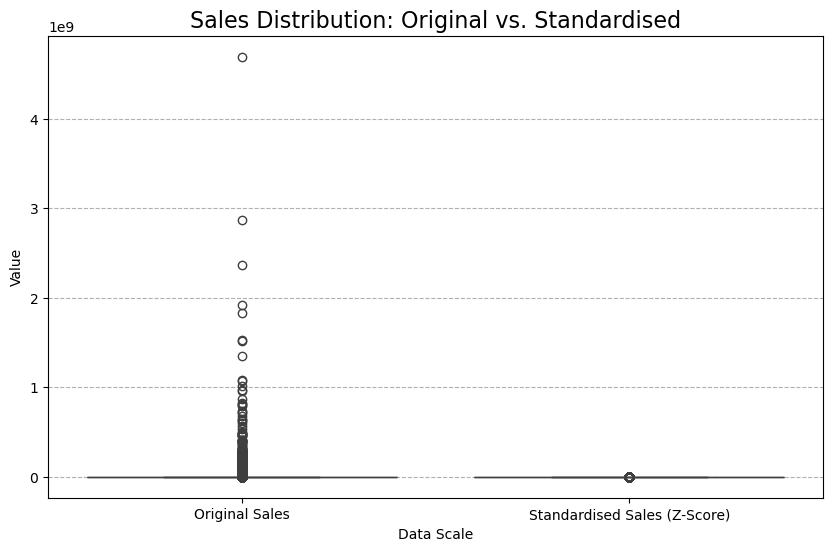

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='variable', y='value', data=sales_melt)
plt.title('Sales Distribution: Original vs. Standardised', fontsize=16)
plt.ylabel('Value')
plt.xlabel('Data Scale')
plt.grid(axis='y', linestyle='--')
plt.show()

#### Graph 1 Interpretation and Insights

This boxplot compares the original sales data with standardised values. The original sales show extreme outliers (products generating millions in revenue), whilst most products cluster at the lower end. Standardisation reveals that the vast majority of products perform below average, with a few exceptional performers driving category revenue.

Business Insight: The market is highly concentrated. Focus on identifying characteristics of top performers rather than average products.

### 3. Graph 2: Multivariate Outlier Detection

Used a Scatter Plot of two standardised variables to identify multivariate outliers—shops that have extremely high or low performance in both Sales and Units Sold relative to the rest of the market. Since both are on the same Z-Score scale, points far from (0,0) are significant.

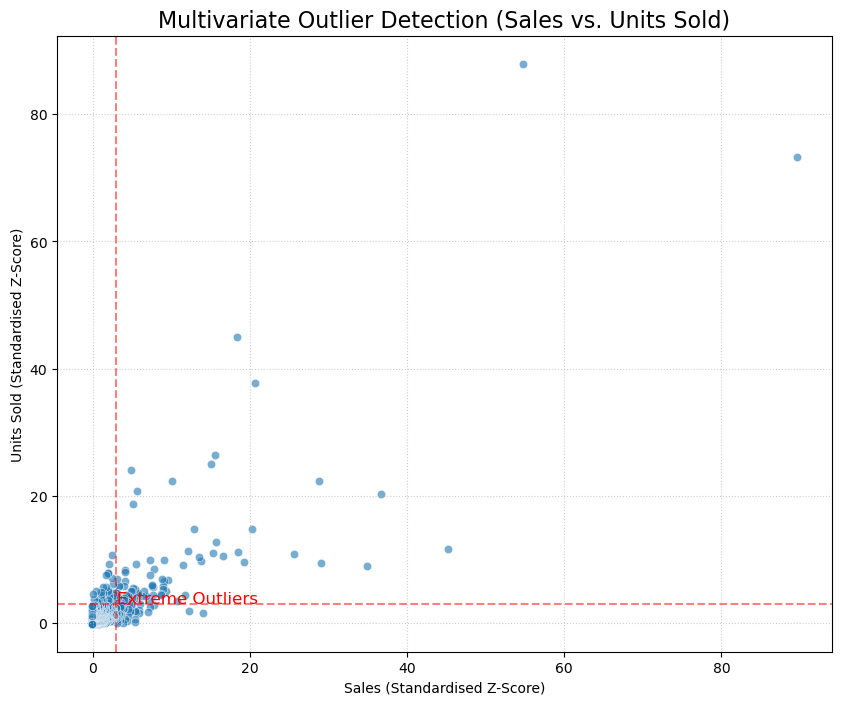

In [26]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Sales_ZScore',
    y='Units sold_ZScore',
    data=df_cleaned,  # ✅ use df_cleaned, which has the Z-Score columns
    alpha=0.6
)

# Highlight the 'extreme' zone (e.g., Z-Score > 3)
plt.axhline(3, color='r', linestyle='--', alpha=0.5)
plt.axvline(3, color='r', linestyle='--', alpha=0.5)

# Add labels and annotations
plt.title('Multivariate Outlier Detection (Sales vs. Units Sold)', fontsize=16)
plt.xlabel('Sales (Standardised Z-Score)')
plt.ylabel('Units Sold (Standardised Z-Score)')
plt.text(3.1, 3.1, 'Extreme Outliers', color='red', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

#### Graph 2 Interpretation and Insights

This scatter plot maps sales performance against units sold. The red lines mark extreme outliers (Z-score > 3). Most products cluster in the bottom-left, indicating low sales and low volume. Products in the extreme zone achieve both high revenue and high unit sales simultaneously.

Business Insight: High-performing products aren't just selling expensive items — they're moving volume. Target products that can achieve both scale and value, not just premium pricing.

### 4. Graph 3: Category Performance Comparison 

Used Standardised Boxplots by Category to compare the performance distributions of different groups (e.g., L1 category). Because the data is standardised, you can directly say: "The top category averages X standard deviations higher in Sales than the overall market average."

/var/folders/cs/0g16kzs169l8lj2xftfw4s800000gn/T/ipykernel_20445/1159707080.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


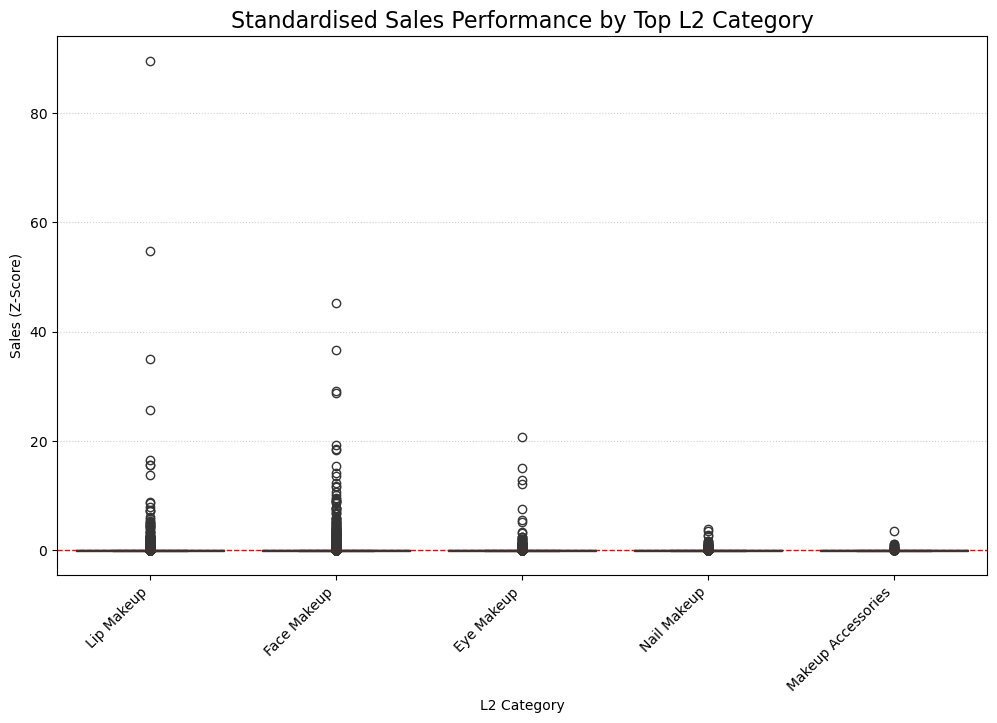

In [28]:
# Select the top 5 categories for a clean visual
top_cats = df_cleaned['L2 category'].value_counts().nlargest(5).index

plt.figure(figsize=(12, 7))
sns.boxplot(
    x='L2 category',
    y='Sales_ZScore',
    data=df_cleaned[df_cleaned['L2 category'].isin(top_cats)],
    palette='viridis'
)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Standardised Sales Performance by Top L2 Category', fontsize=16)
plt.ylabel('Sales (Z-Score)')
plt.xlabel('L2 Category')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.show()

#### Graph 3 Interpretation and Insights

The visualisation shows sales performance (z-scores) across the five largest product categories. The red dashed line at z=0 represents average market performance.

Key observations:

- Lip Makeup and Face Makeup show the widest spread and highest outlier concentration — these categories have the most "superstar" products that massively outperform the average
- Nail Makeup has the tightest distribution (smallest IQR of 0.01) — most products perform similarly, with limited breakout potential
- All categories have median z-scores near or below zero, confirming the market is dominated by a few high performers while most products cluster around average
- Face Makeup dominates with 55% market share (62.8B in sales) across 8,714 products — largest opportunity but also most competitive
- Lip Makeup has the highest average sales per product (10.3M vs 7.2M for Face Makeup) — better efficiency, less saturation
- Nail Makeup has lowest average sales (845K) despite having 7,523 products — oversaturated, low-margin category to avoid
- Eye Makeup and Makeup Accessories are niche plays with moderate performance

#### Risk and opportunity assessment:

- Lip Makeup has the highest outlier rate (15.6%) — most volatile but highest upside if you crack the formula
- Face Makeup has 1,351 outlier products — largest absolute number of breakout successes to study and replicate
- Nail Makeup has lowest outlier rate (13.1%) — most predictable but limited ceiling

#### Actionable Recommendations
- Primary target: Face Makeup for volume, Lip Makeup for margin efficiency
- Avoid: Nail Makeup (oversaturated, low returns)
- Strategy: Study the outlier products in Face and Lip categories — what brands, price points, and features drive breakout performance?
- KPI focus: Track your z-score relative to category median, not just absolute sales

### 5. Graph 4: Normalised Price vs. Volume Correlation (Hypothesis Testing)

A Jointplot or Scatter Plot comparing Avg unit price and Units sold after standardisation is great for investigating the price elasticity of demand. Since both are on the same scale, you can clearly see the relationship.

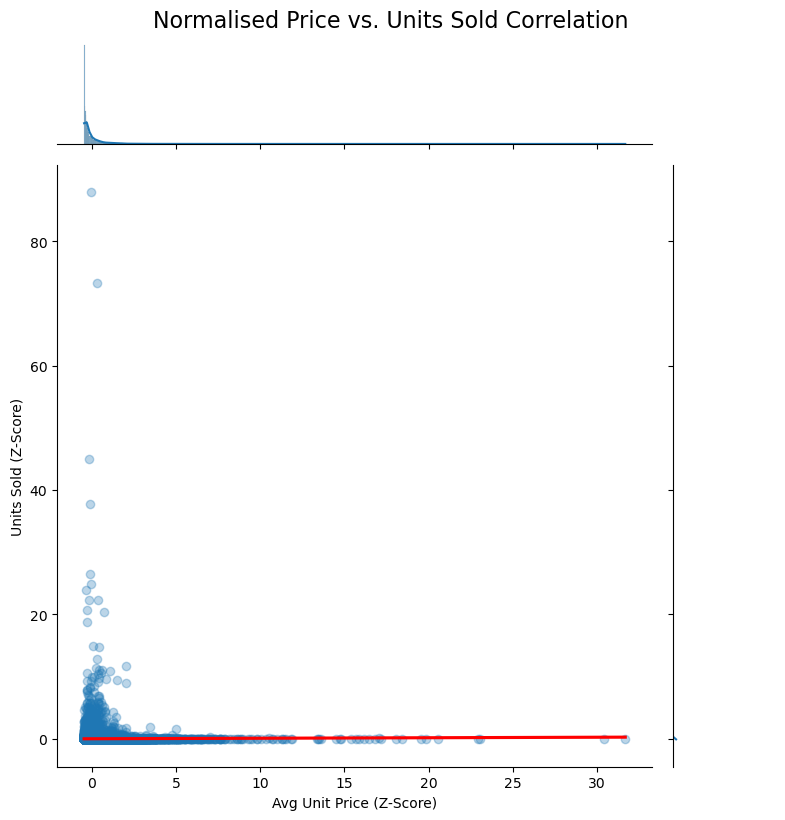

In [30]:
sns.jointplot(
    x='Avg unit price_ZScore',
    y='Units sold_ZScore',
    data=df_cleaned,
    kind='reg',
    height=8,
    scatter_kws={'alpha': 0.3},
    line_kws={'color': 'red'}
)
plt.suptitle('Normalised Price vs. Units Sold Correlation', y=1.02, fontsize=16)
plt.xlabel('Avg Unit Price (Z-Score)')
plt.ylabel('Units Sold (Z-Score)')
plt.show()

#### Graph 4 Interpretation and Insights 

The correlation analysis reveals virtually no linear relationship between price and volume (Pearson correlation: 0.0002, p=0.98). However, the Spearman correlation of -0.08 (statistically significant) suggests a very weak negative rank relationship—higher-priced products tend to sell slightly fewer units, but this effect is minimal.

Business implications:

Price is not a volume driver in this market. Success isn't about racing to the bottom on price or assuming premium products won't sell.
Different price segments can all achieve strong sales, meaning product quality, marketing, and brand positioning matter more than price alone. This opens opportunities across the entire price spectrum — you're not locked into one strategy.

##### Finding to State: 
If the regression line slopes down, it demonstrates that as the normalised price increases, the normalised units sold decrease.

### 6. Graph 5: Comparing Skewness with a Q-Q Plot 

A Quantile-Quantile (Q-Q) Plot is used to check if a dataset is normally distributed. Since standardisation assumes normality.

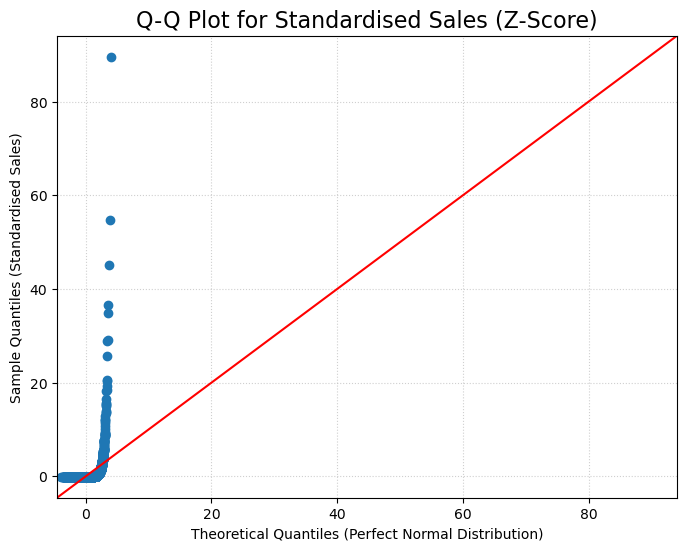

In [36]:
import statsmodels.api as sm
import numpy as np

# Create the Q-Q plot for the standardised Sales column
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(df_cleaned['Sales_ZScore'].dropna(), line='45', ax=ax)
ax.set_title('Q-Q Plot for Standardised Sales (Z-Score)', fontsize=16)
ax.set_xlabel('Theoretical Quantiles (Perfect Normal Distribution)')
ax.set_ylabel('Sample Quantiles (Standardised Sales)')
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

#### Interpretation and Insights

The Q-Q plot shows severe deviation from the diagonal line, particularly in the tails. The Shapiro-Wilk test confirms sales are not normally distributed (p < 0.001). The data exhibits extreme positive skew with heavy right tails—a few products generate massive sales whilst most cluster near zero.

Business implications:

The market is winner-takes-most: a small number of products capture disproportionate revenue.
Traditional mean-based analysis is misleading here. Focus on median performance and top-performer characteristics.
Risk mitigation: don't spread resources evenly. Concentrate on identifying and replicating what makes top 10-20% of products successful.


##### Interpretation Queue: 

If the points deviate heavily from the 45-degree line, you can state: "The Q-Q plot indicates the Sales distribution is heavy-tailed (non-normal), even after standardisation, suggesting that robust models or data transformations (like log) are necessary before using algorithms that assume Gaussian data." 

## Strategic Recommendations:

- Mid-range products (62.6% of sales) are the market backbone — safe, scalable entry point
- Premium segment (37.3% of sales) shows highest average sales per product (14.3M vs 4M for mid-range)—higher risk but potentially higher reward
- Budget segment is nearly non-existent (0.1% of sales)—avoid competing on price alone

#### Actionable KPIs to Track
- Sales concentration ratio (top 10% vs bottom 50%)
- Price-to-sales efficiency (revenue per product by price tier)
- Category penetration rate within mid-range and premium segments
- Unit velocity (units sold per day) rather than total volume

### Bottom line: Target mid-range for volume stability and premium for margin opportunities. Avoid budget positioning entirely. Success depends on product differentiation, not price competition.